<a href="https://colab.research.google.com/github/qjmiller/portfolio/blob/main/PYTHON_PROJECT_MAIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# importing dataset
df = pd.read_csv('hmd_python.csv')
df.head()

,Invoice,TransactionDate,DeliveryDate,EmpKey,ChannelKey,StoreID,ProductKey,CustomerKey,Qty,Cost,Price,ProductDescription,Brand,Type,Color,CityName,CountryName,Channel,CustomerName,Industry
0,E1072592,"Tue Jan 01, 2002","Tue Jan 22, 2002",E04,9,IN288,FL-125,72,1,1472,1958,ForkLifts-Bradshaw-HeavyDuty-YellowBlack,Bradshaw,HeavyDuty,YellowBlack,Mumbai,India,Brochure,Skanska,Construction
1,E1072593,"Tue Jan 01, 2002","Wed Jan 16, 2002",E12,9,BZ118,RP-243,47,1,6618,9265,RoadPavers-Raygo-LightDuty-WhiteYellow,Raygo,LightDuty,WhiteYellow,SaoPaulo,Brazil,Brochure,LGCorp,Conglomerate
2,E1072594,"Tue Jan 01, 2002","Mon Jan 21, 2002",E02,3,NM120,RD-516,48,2,10672,12593,RockDrillers-Tranter-LightDuty-White,Tranter,LightDuty,White,Windhoek,Namibia,Magazine,Lukoil,Oil&Gas
3,E1072595,"Tue Jan 01, 2002","Thu Jan 31, 2002",E07,4,US213,BZ-801,73,1,3013,4007,Bulldozers-JCB-HeavyDuty-Yellow,JCB,HeavyDuty,Yellow,Nashville,US,CustomerReview,State Grid of China,Electricity
4,E1072596,"Tue Jan 01, 2002","Mon Jan 21, 2002",E03,3,US219,BZ-812,16,1,7396,9171,Bulldozers-Case-HeavyDuty-White,Case,HeavyDuty,White,Detroit,US,Magazine,Cargill,FoodProcessing


# **Analysis Sections and Questions**

**Q1. Brands with the highest volume of products sold**


In [12]:
# Grouping data buy brand and sum of Quntity and sorting values
brands_grouped = df.groupby('Brand')['Qty'].sum()
brands_sorted = brands_grouped.sort_values(ascending=False)
top_3_brnads = brands_sorted.head(3)
print(top_3_brnads)

Brand
Caterpillar    40467
Volvo          23717
JCB            20433
Name: Qty, dtype: int64


<ipython-input-13-b267128fc69d>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




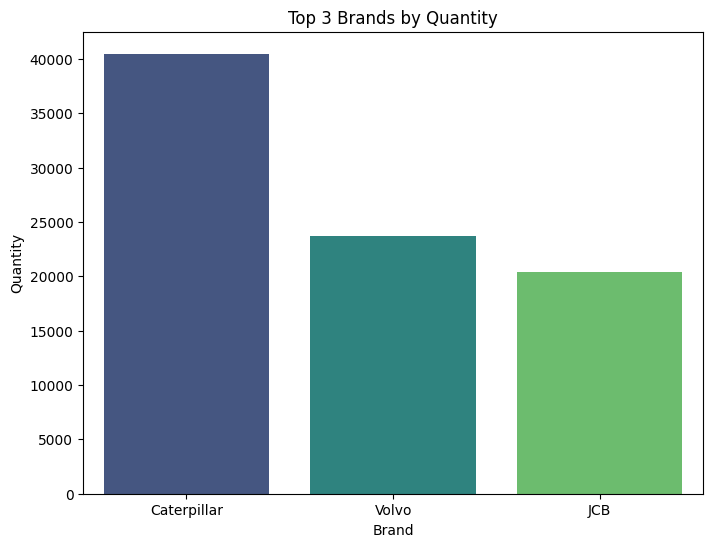

In [13]:
#Plotting a visual of Top 3 Brands by Quantity
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=top_3_brnads.index, y=top_3_brnads.values, palette='viridis')
plt.title('Top 3 Brands by Quantity')
plt.xlabel('Brand')
plt.ylabel('Quantity')
plt.show()

**Q3. Monthly Sales Trends (2002-2012)**

<ipython-input-26-e7752d376802>:7: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



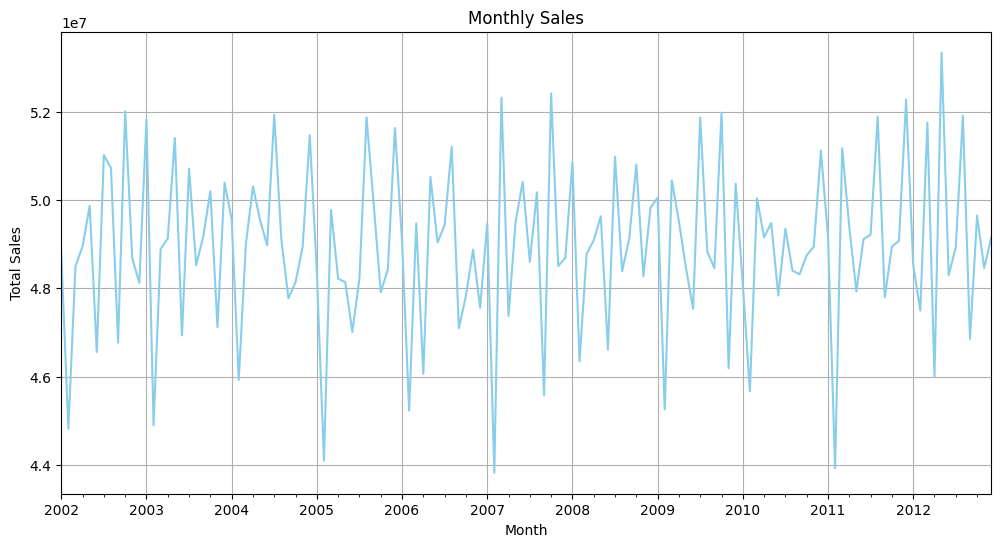

In [26]:
# Converting into datetime and filtering data until 2012
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df = df[df['TransactionDate'] <= '2012-12-31']

# Calculating monthly sales
df.set_index('TransactionDate', inplace=True)
monthly_sales = df['Price'].resample('M').sum()

# Plotting a visual of monthly sales
plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', color='skyblue')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

**Q4.Most Effective Marketing Channels**


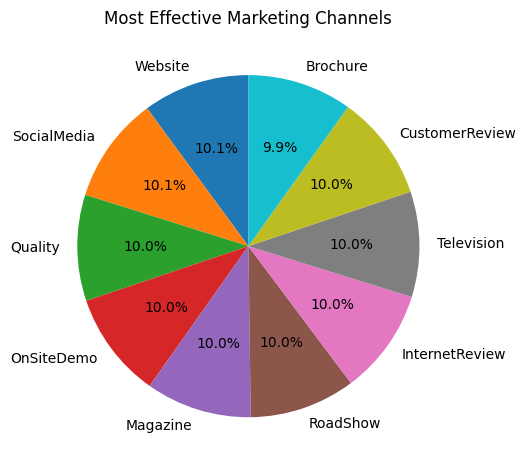

In [16]:
df['Sales'] = df['Price'] * df['Qty']
channel_grouped = df[df['Sales'] > 0].groupby('Channel')['Sales'].sum()
channel_sorted = channel_grouped.sort_values(ascending=False)
top_10_channels = channel_sorted.head(10)
plt.pie(top_10_channels, labels=top_10_channels.index, autopct='%1.1f%%', startangle=90)
plt.title('Most Effective Marketing Channels')
plt.tight_layout()
plt.show()


**Q5. Regions Driving the Most Sales**

In [17]:
region_sorted= df.groupby(['CountryName','CityName'])['Price'].sum().sort_values(ascending=False)
top_10_regions = region_sorted.head(10)
print(top_10_regions)

#using dictionary do define our dataset for geographic heat map
data = {
    'CountryName': ['Australia', 'Rwanda', 'Tunisia', 'India', 'China', 'Norway', 'UAE', 'Namibia', 'SouthAfrica', 'NewZealand'],
    'CityName': ['Melbourne', 'Kigali', 'Tunis', 'Kolkata', 'Taipei', 'Drammen', 'Fujairah', 'Windhoek', 'Capetown', 'Christchurch'],
    'Latitude': [-37.8136, -1.9706, 36.8065, 22.5726, 25.0330, 59.7400, 25.1118, -22.5597, -33.9249, -43.5321],
    'Longitude': [144.9631, 30.1044, 10.1647, 88.3639, 121.5654, 10.2045, 56.3269, 17.0836, 18.4232, 172.6362],
    'Sales': [79609705, 79509927, 79438303, 79181877, 79054103, 79020577, 78960368, 78878227, 78830606, 78809606]
}
# creating Data Frame
df_regions = pd.DataFrame(data)
# creating the heatmap by using Plotly scattermapbox
fig = px.scatter_mapbox(df_regions, lat='Latitude', lon='Longitude', size='Sales',
color='Sales', color_continuous_scale='Cividis', size_max=15, title='Heatmap of Sales by Region',
                        hover_name='CountryName', hover_data=['CityName', 'Sales'])
# Update map settings for better appearance
fig.update_layout(mapbox_style="carto-positron", mapbox_zoom=1.5, mapbox_center={"lat": 20, "lon": 20})
fig.show()

CountryName  CityName    
Australia    Melbourne       79609705
Rwanda       Kigali          79509927
Tunisia      Tunis           79438303
India        Kolkata         79181877
China        Taipei          79054103
Norway       Drammen         79020577
UAE          Fujairah        78960368
Namibia      Windhoek        78878227
SouthAfrica  Capetown        78830606
NewZealand   Christchurch    78809606
Name: Price, dtype: int64


Q6. What are the Most Popular Products?

<ipython-input-18-5633f789e985>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




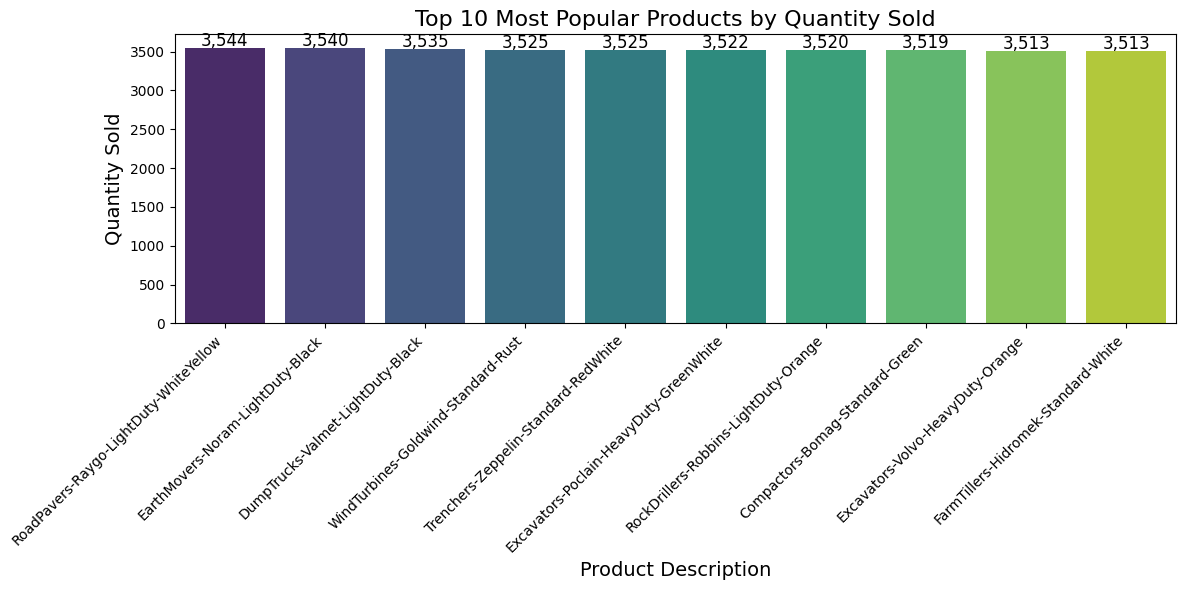

In [18]:
# Group by ProductKey and sum the quantity sold
product_sales = df.groupby('ProductKey')['Qty'].sum().reset_index()

# Sort by quantity sold in descending order
product_sales_sorted = product_sales.sort_values(by='Qty', ascending=False)

# Get the top 10 most popular products
top_products = product_sales_sorted.head(10)

# Merge the ProductKey with the corresponding ProductDescription
top_products_with_description = top_products.merge(df[['ProductKey', 'ProductDescription']].drop_duplicates(), on='ProductKey', how='left')

# Visualization with Seaborn (Bar Chart)
plt.figure(figsize=(12, 6))

# Create the barplot with Product Description on the X-axis
ax = sns.barplot(data=top_products_with_description, x='ProductDescription', y='Qty', palette='viridis')

# Add labels and title
plt.title('Top 10 Most Popular Products by Quantity Sold', fontsize=16)
plt.xlabel('Product Description', fontsize=14)
plt.ylabel('Quantity Sold', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',  # Format the quantity (integer, no decimals)
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position the label at the top of the bar
                ha='center', va='center',  # Align the label in the center of the bar
                fontsize=12, color='black',  # Customize label appearance
                xytext=(0, 5),  # Adjust label's distance from the bar
                textcoords='offset points')
# Adjust layout for better spacing
plt.tight_layout()
# Display the plot
plt.show()


#**Product Analysis**

**Q10. Which Products are Most Likely to be Repurchased?**

<ipython-input-20-cedc822910ff>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




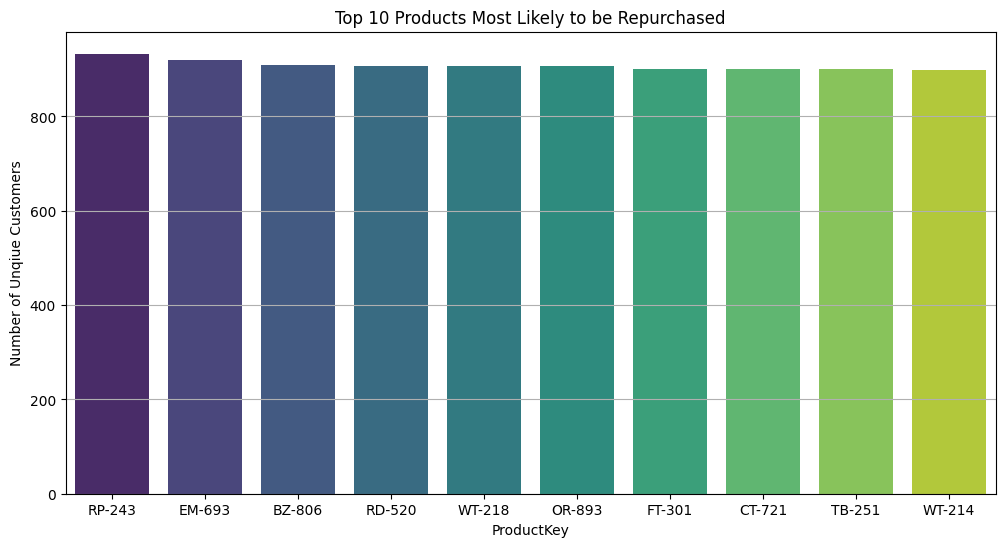

In [20]:
# Sort by CustomerKey and TransactionDate
df.sort_values(by=['CustomerKey', 'TransactionDate'], inplace=True)

# Group by ProductKey and CustomerKey to count purchases
purchase_counts = df.groupby(['ProductKey', 'CustomerKey']).size().reset_index(name='PurchaseCount')

# Filter to find purchases > 1
repeat_purchases = purchase_counts[purchase_counts['PurchaseCount'] > 1]

# Count the unique customers who repurchased each product
repurchase_summary = repeat_purchases.groupby('ProductKey').agg(TotalRepurchases=('PurchaseCount', 'sum'), UniqueCustomers=('CustomerKey', 'nunique')).reset_index()

# Sort to find the most popular repurchases
repurchase_summary.sort_values(by='UniqueCustomers', ascending=False, inplace=True)

# Plot a visual using seaborn
plt.figure(figsize=(12,6))
sns.barplot(data=repurchase_summary.head(10), x='ProductKey', y='UniqueCustomers', palette='viridis')
plt.title('Top 10 Products Most Likely to be Repurchased')
plt.xlabel('ProductKey')
plt.ylabel('Number of Unqiue Customers')
plt.grid(axis='y')
plt.show()

#**Geographical Analysis**

**Q11.Which Regions are Generating the Most Sales?**

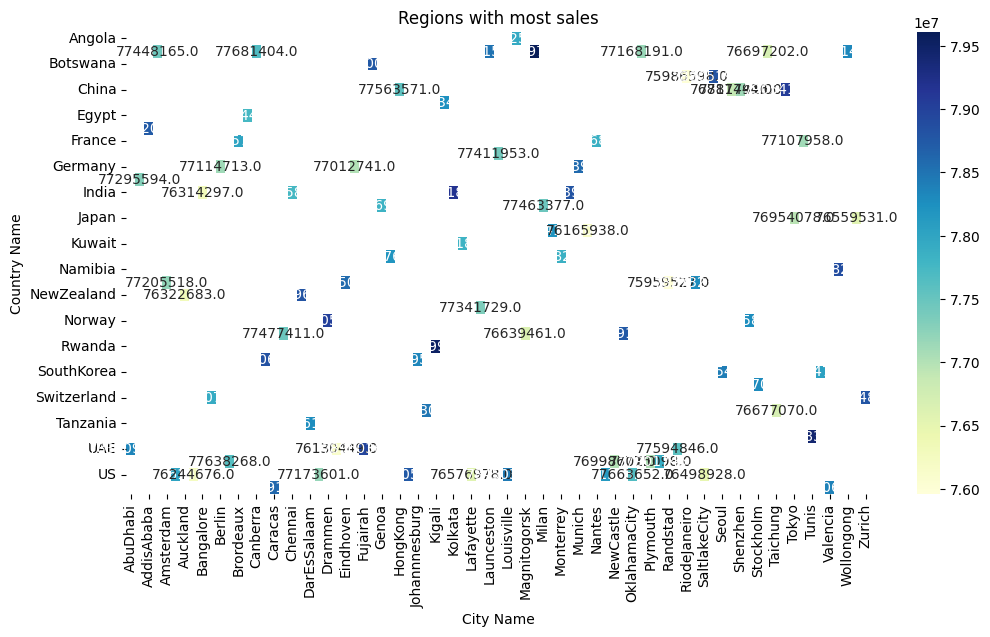

In [11]:
#Grouping by 'CountryName', 'CityName', and sum the 'Price' within those groups
growth = df.groupby(['CountryName','CityName'])['Price'].sum().reset_index()

pivot_growth = growth.pivot(index='CountryName', columns='CityName', values='Price')

#Plotting the regions with most sales
plt.figure(figsize=(12, 6))
sns.heatmap(data=pivot_growth, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Regions with most sales')
plt.xlabel('City Name')
plt.ylabel('Country Name')

plt.show()

**Q12.Which Regions are Growing the Fastest?**

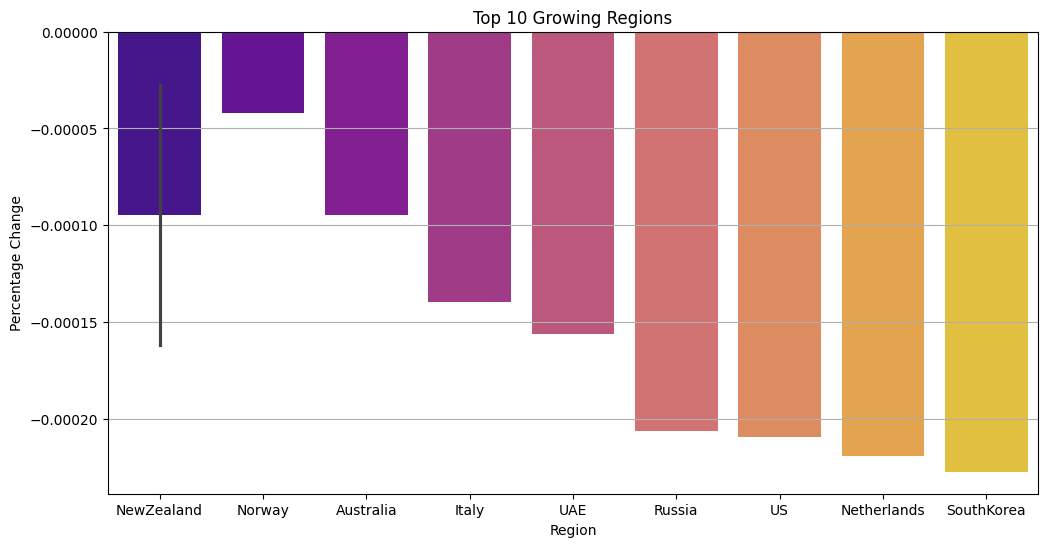

In [25]:
#Transforming 'TransactionDate' column to date format to extract Year
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

#Adding a new column 'Year' after with extracted year value
df['Year'] = df['TransactionDate'].dt.year

#Grouping by 'CountryName', 'CityName', 'Year', and sum the 'Price' within those groups
growth = df.groupby(['CountryName','CityName','Year'])['Price'].sum().sort_values(ascending=False)

#Calculating percentage change in sales year-over-year
growth_pct_change = growth.pct_change() * 100

#Creating a new DataFrame that includes both 'Price' and 'Price_Pct_Change'
growth_with_pct_change = pd.DataFrame({'Price': growth, 'Price_Pct_Change': growth_pct_change})

#Sorting values by 'Price_Pct_Change' in descending order
growth_with_pct_change.sort_values(by='Price_Pct_Change', ascending=False, inplace=True)

growth_with_pct_change.head(10)

#Plotting the top 10 growing regions
plt.figure(figsize=(12, 6))
growth_with_pct_change_reset = growth_with_pct_change.reset_index()
sns.barplot(data=growth_with_pct_change_reset.head(10), x='CountryName', y='Price_Pct_Change', hue='CountryName', palette='plasma')
plt.title('Top 10 Growing Regions')
plt.xlabel('Region')
plt.ylabel('Percentage Change')
plt.grid(axis='y')

plt.show()

Q14. How Do Customer Demographics Vary by Region?

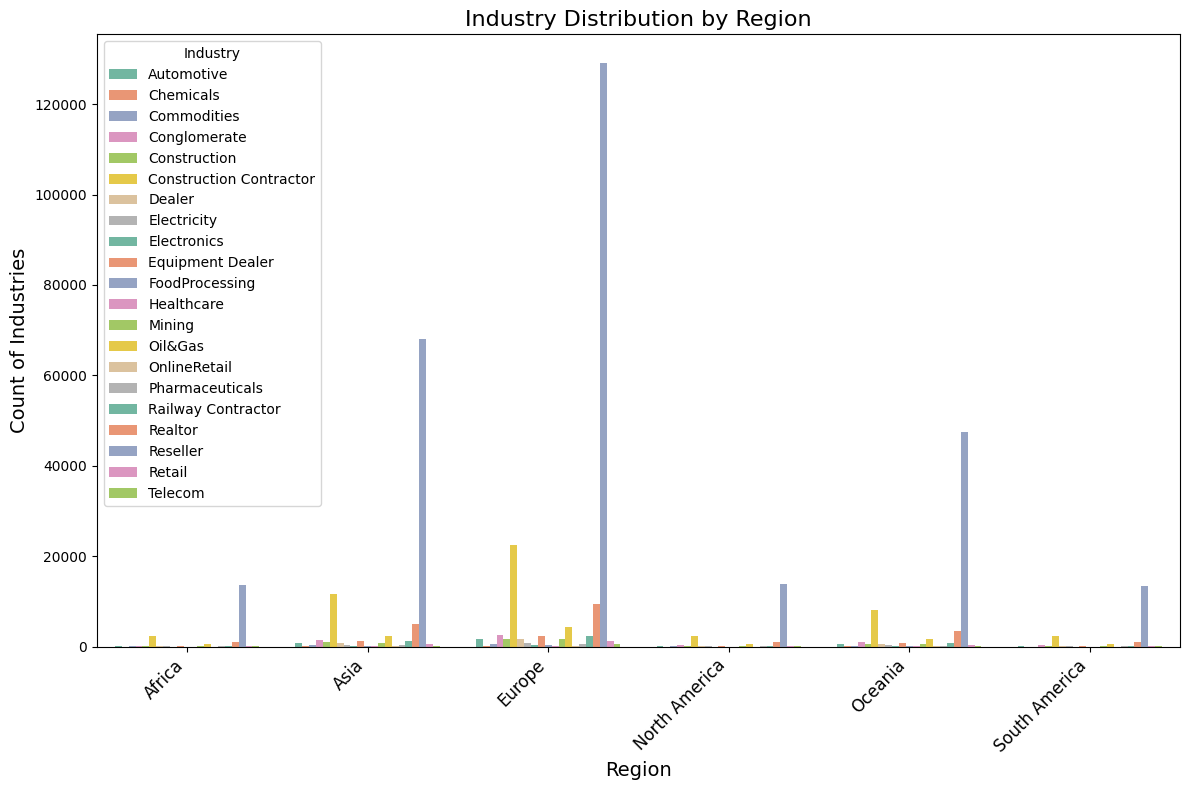

In [22]:
country_to_region = {
    'USA': 'North America',
    'Canada': 'North America',
    'Germany': 'Europe',
    'France': 'Europe',
    'India': 'Asia',
    'China': 'Asia',
    'Brazil': 'South America',
    'Australia': 'Oceania',
    'South Africa': 'Africa',
    'Japan': 'Asia',
    'UK': 'Europe',
    'Mexico': 'North America',
    'Argentina': 'South America',
    'Russia': 'Europe',
    'Egypt': 'Africa',
    'Nigeria': 'Africa',
    'Italy': 'Europe',
    'South Korea': 'Asia',
    'Nigeria': 'Africa',
    'Spain': 'Europe',
    'Netherlands': 'Europe',}

df['Region'] = df['CountryName'].map(country_to_region)

# Group by 'Region' and 'Industry' and count occurrences
demographics_by_region = df.groupby(['Region', 'Industry']).size().reset_index(name='Count')

# Create a simple bar plot grouped by region
plt.figure(figsize=(12, 8))  # Adjust the size for better visibility

# Create a bar plot with seaborn, grouped by region and hue set to Industry
sns.barplot(data=demographics_by_region, x='Region', y='Count', hue='Industry', palette='Set2')

# title and labels
plt.title('Industry Distribution by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Count of Industries', fontsize=14)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Display the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

# **Customer Analysis**

**Q18. What Products are They Most Interested in?**

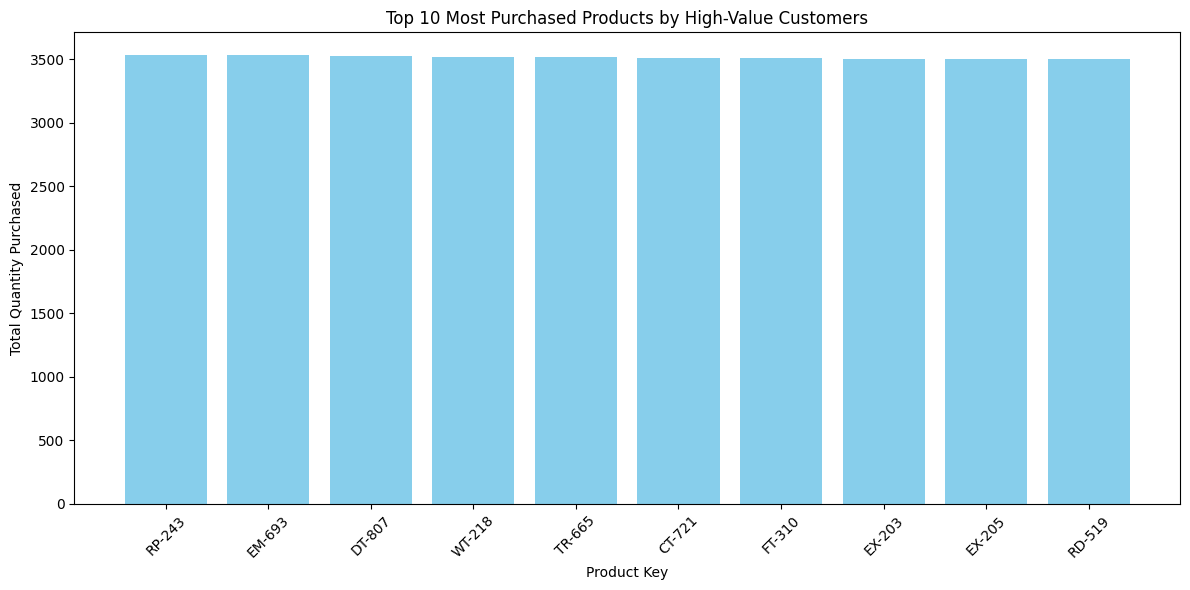

In [23]:
high_value_customers = df.groupby('CustomerKey').filter(lambda x: x['Qty'].sum() > 10)

product_freq = high_value_customers.groupby('ProductKey')['Qty'].sum().reset_index()

popular_products = product_freq.sort_values(by='Qty', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(popular_products['ProductKey'].astype(str).head(10), popular_products['Qty'].head(10), color='skyblue')
plt.title('Top 10 Most Purchased Products by High-Value Customers')
plt.xlabel('Product Key')
plt.ylabel('Total Quantity Purchased')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Q19. How Can We Increase Customer Loyalty?**

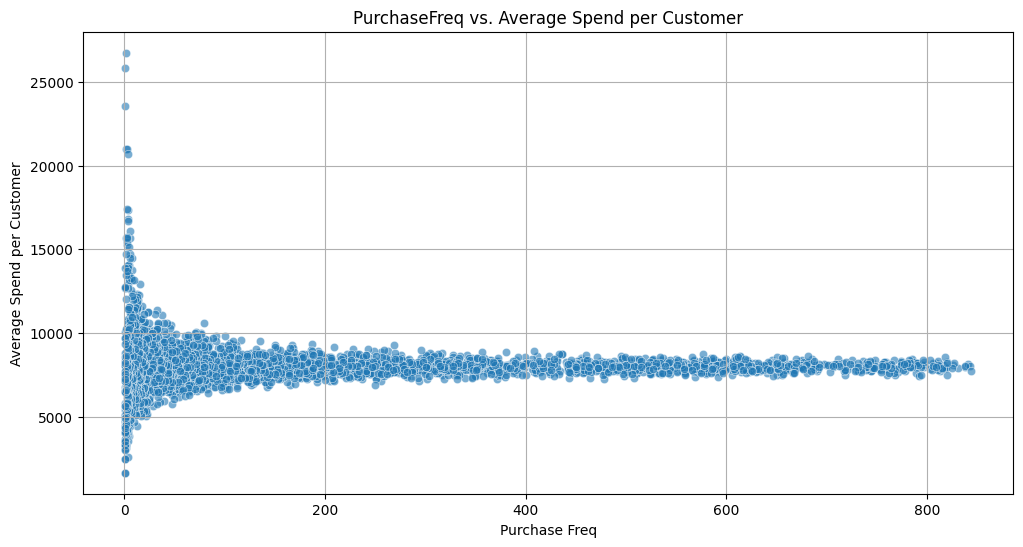

In [24]:
df.reset_index(inplace=True)
# Analyze repeat purchase frequency and total spend
customer_summary = df.groupby('CustomerKey').agg(TotalSpend=('Price', 'sum'), PurchaseFreq=('TransactionDate', 'count')).reset_index()

# Calculate average spend per purchase
customer_summary['AverageSpend'] = customer_summary['TotalSpend'] / customer_summary['PurchaseFreq']

# Visualize the purchase of freq and average spend
plt.figure(figsize=(12,6))
sns.scatterplot(data=customer_summary, x='PurchaseFreq', y='AverageSpend', alpha=0.6)
plt.title('PurchaseFreq vs. Average Spend per Customer')
plt.xlabel('Purchase Freq')
plt.ylabel('Average Spend per Customer')
plt.grid()
plt.show()

Q20. What are the Most Common Customer Complaints?

NO INFORMATION WAS PROVIDED BY ORIGNAL DATA FOR ANYTHING RELATED TO COMPLAINTS OR REVIEWS